In [2]:
!pip install imageio==2.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
im = imageio.imread("../imagenes/s3/3.pgm")
im=im.astype(np.uint8)
print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


In [5]:
print('Max original ' ,end='')
print(np.amax(im))
print('min original ' ,end='')
print(np.amin(im))

Max original 204
min original 10


In [6]:
im_original=im
im=im/255

print('Max original ' ,end='')
print(np.amax(im))
print('min original ' ,end='')
print(np.amin(im))

Max original 0.8
min original 0.0392156862745098


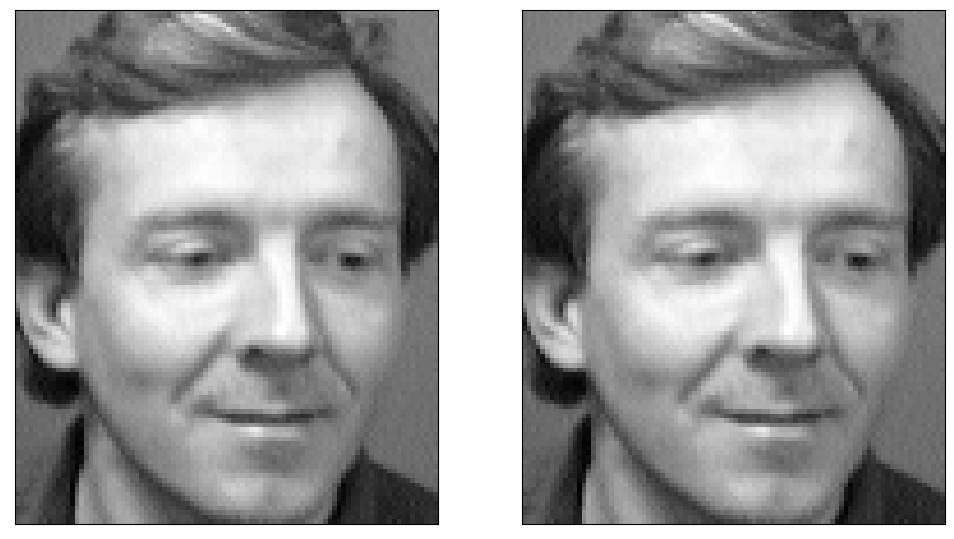

In [7]:
fix, ax = plt.subplots(1,2,figsize=(12,12),

                        subplot_kw={'xticks':[],'yticks':[]})

ax[0].imshow(im_original,cmap="gray")
ax[1].imshow(im_original,cmap="gray")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


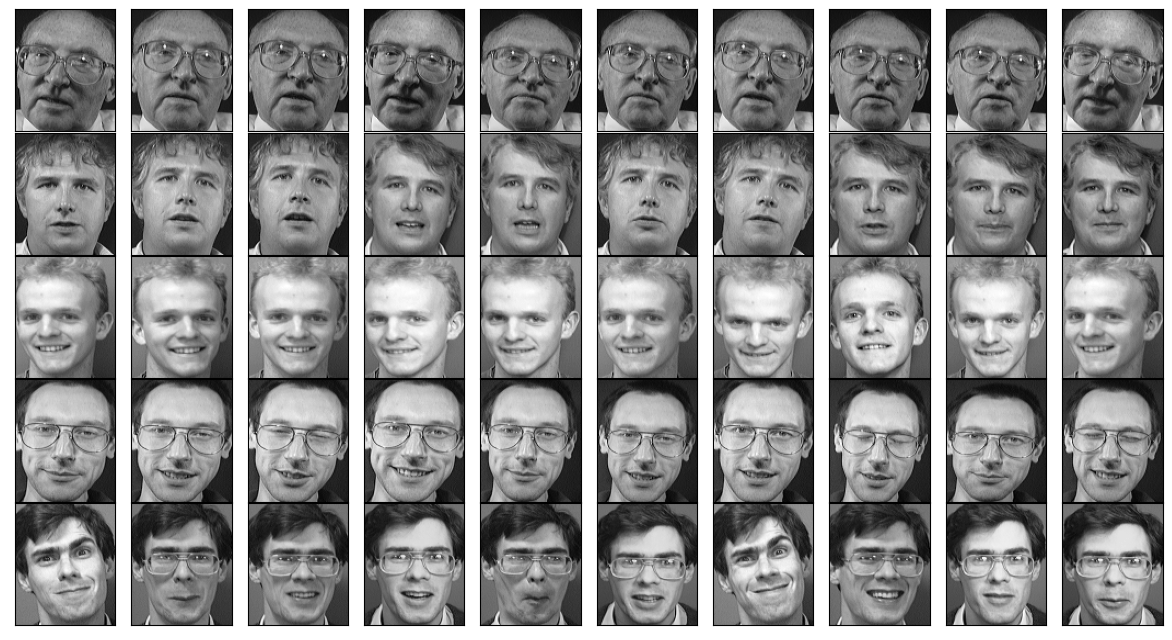

In [8]:
from glob import iglob

caras=pd.DataFrame([])

for path in iglob ('../imagenes/*/*.pgm'):
    im=imageio.imread(path)
    cara=pd.Series(im.flatten(),name=path)
    caras=caras.append(cara)

fix, axes = plt.subplots(5,10,figsize=(15,8),
                        subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.01,wspace=0.01))

for i ,ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92),cmap="gray")

In [9]:
from sklearn.decomposition import PCA


In [10]:
caras_pca =PCA(n_components=0.9)
caras_pca.fit(caras)

PCA(n_components=0.9)

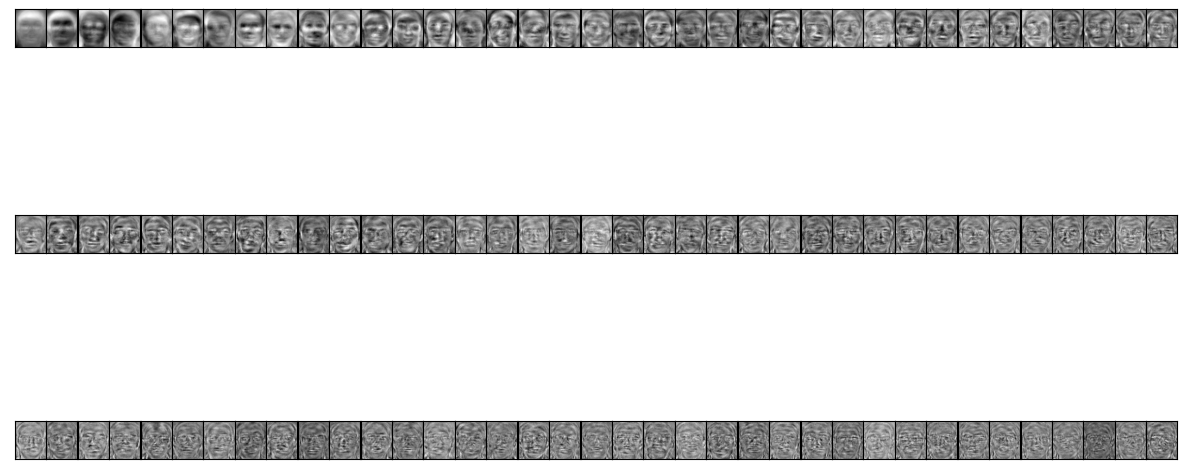

In [11]:
filas=3
columnas=caras_pca.n_components_//filas

fix, axes = plt.subplots(filas,columnas,figsize=(15,8),
                        subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.01,wspace=0.01))

for i ,ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92),cmap="gray")

In [12]:
caras_pca.n_components_

111

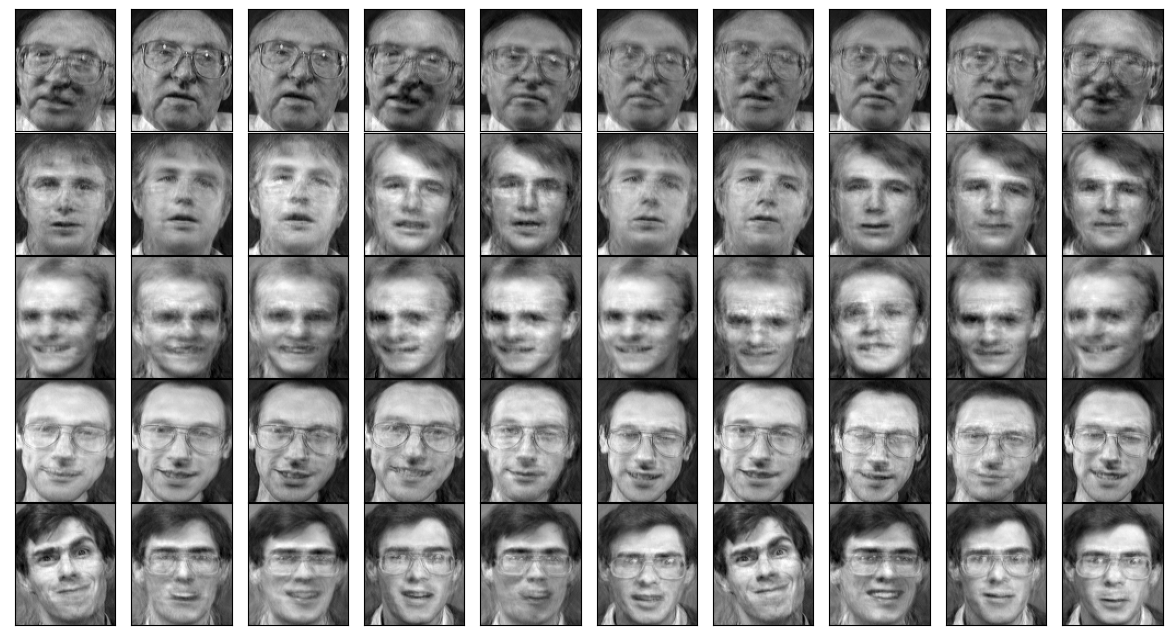

In [13]:
componentes = caras_pca.transform(caras)
proyeccion= caras_pca.inverse_transform(componentes)

fix, axes = plt.subplots(5,10,figsize=(15,8),
                        subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.01,wspace=0.01))

for i ,ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92),cmap="gray")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4a76e78-c18a-4fc7-af6b-dc86cc664138' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>